# practice 


In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import SVC

In [2]:
hp = pd.read_csv('C:/Users/LENOVO/Downloads/diabetes2.csv')

In [3]:
hp.shape

(768, 9)

In [4]:
hp.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
hp.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [12]:
m=hp.sort_values(by=['Outcome'] , ascending=False)
m

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
276,7,106,60,24,0,26.5,0.296,29,1
270,10,101,86,37,0,45.6,1.136,38,1
269,2,146,0,0,0,27.5,0.240,28,1
266,0,138,0,0,0,36.3,0.933,25,1
...,...,...,...,...,...,...,...,...,...
324,2,112,75,32,0,35.7,0.148,21,0
325,1,157,72,21,168,25.6,0.123,24,0
327,10,179,70,0,0,35.1,0.200,37,0
329,6,105,70,32,68,30.8,0.122,37,0


In [10]:
hp.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
b=hp.corr()
b

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


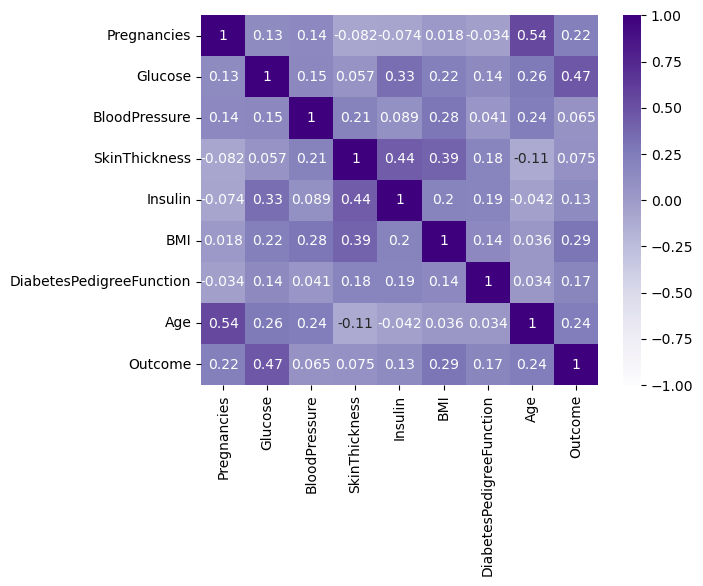

In [14]:
sns.heatmap(b , annot=True , vmin=-1 , vmax=1 , cmap='Purples')
plt.show()

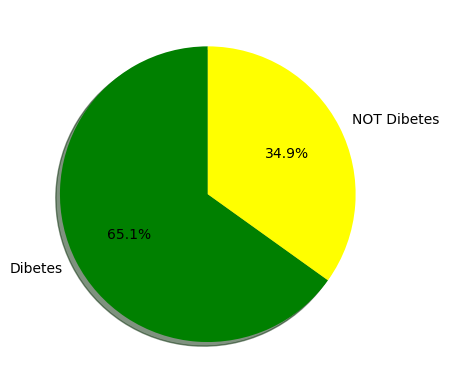

In [16]:
labels = ['Dibetes','NOT Dibetes']
values = hp['Outcome'] .value_counts().values
fig , ax1=plt .subplots()
colors = ['green','yellow']
ax1.pie(values , labels=labels ,autopct = '%1.1f%%',shadow=True , startangle=90 , colors=colors)
plt.show()

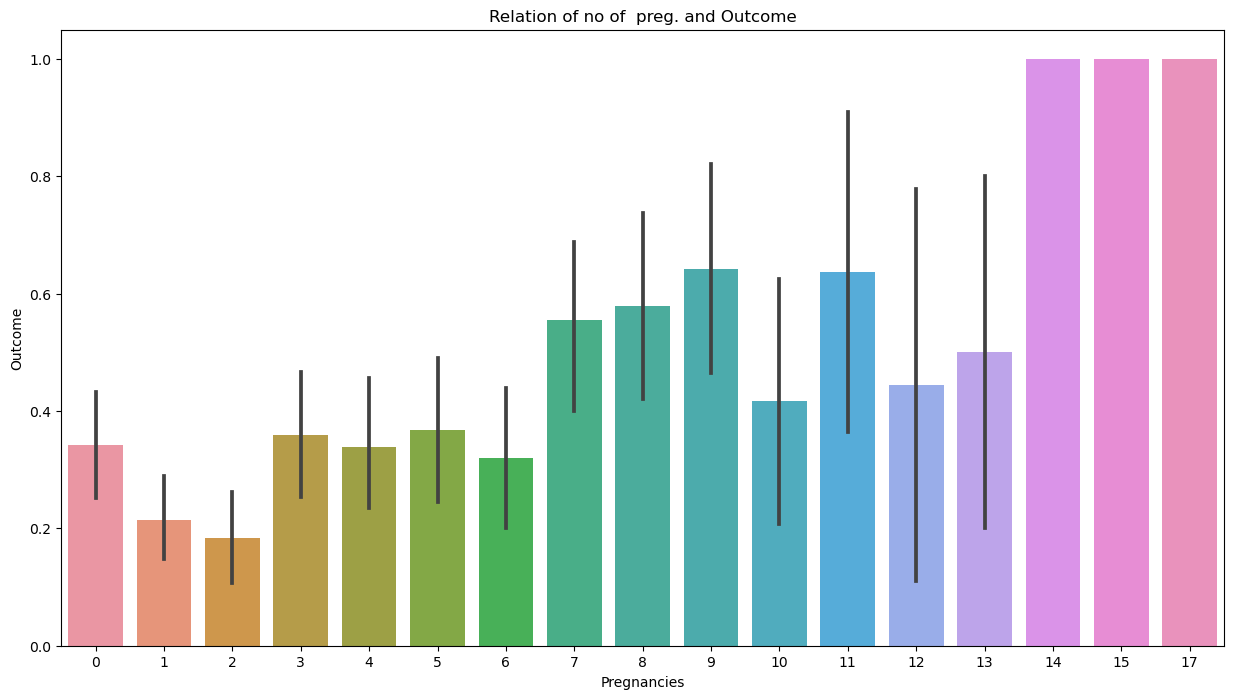

In [18]:
plt.figure(figsize=(15,8))
sns.barplot( x = 'Pregnancies' , y='Outcome' , data=hp)
plt.title('Relation of no of  preg. and Outcome')
plt.show()

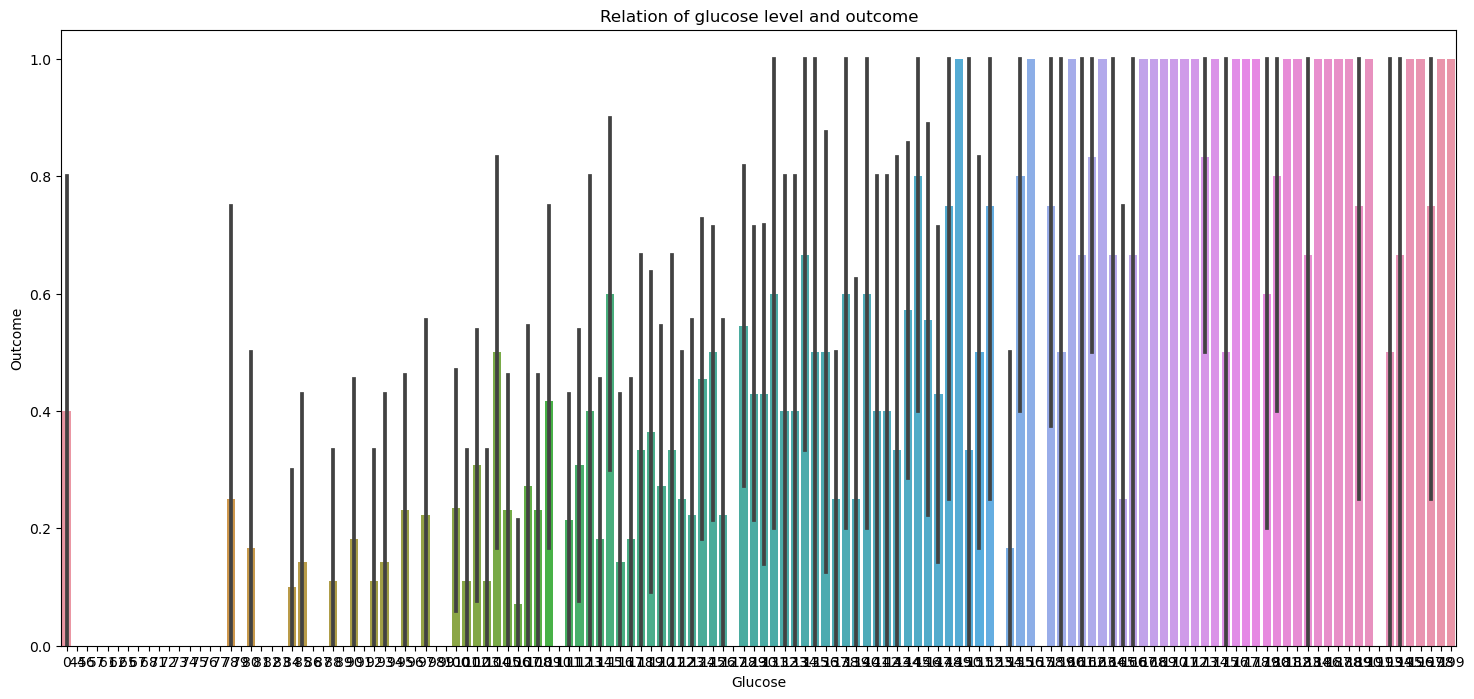

In [21]:
plt.figure(figsize=(18,8))
sns.barplot(x = 'Glucose',y='Outcome',data=hp)
plt.title('Relation of glucose level and outcome')
plt.show()


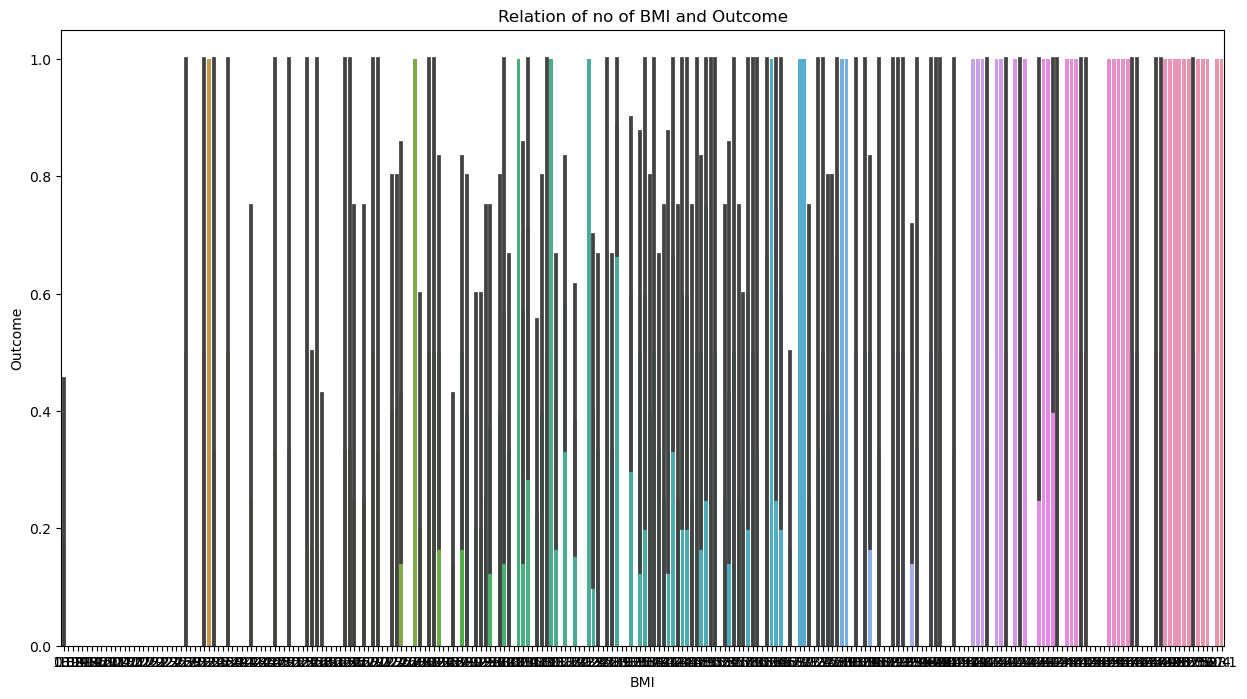

In [22]:
plt.figure(figsize=(15,8))
sns.barplot(x='BMI' , y='Outcome',data=hp)
plt.title('Relation of no of BMI and Outcome')
plt.show()


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


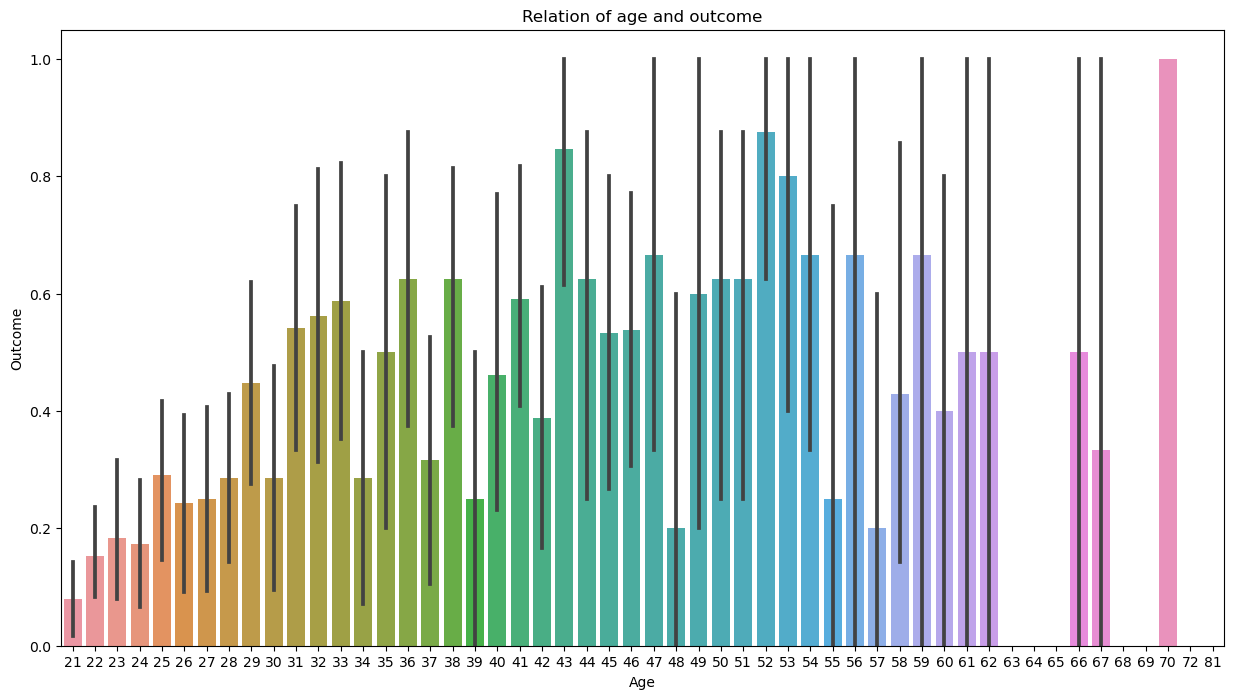

In [25]:
plt.figure(figsize=(15,8))
sns.barplot(hp['Age'],hp['Outcome'] , data=hp)
plt.title('Relation of age and outcome')
plt.show()

In [28]:
scaler = StandardScaler()
x=hp.drop('Outcome',axis=1)
y=hp['Outcome']
scaler.fit(x)
x_transformed=scaler . transform(x)
x_train,x_test,y_train,y_test = train_test_split(x_transformed,y,test_size=0.20 , random_state=16)

In [29]:
model = SVC()
model.fit(x_train,y_train)

SVC()

In [30]:
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)

In [32]:
print('Train set accuracy:' +str(accuracy_score(y_train_pred,y_train)*100))
print('Test set accuracy:' +str(accuracy_score(y_test_pred,y_test)*100))
print('\nconfusion matrix:\n%s'%confusion_matrix(y_test_pred,y_test))
print('\nClassificationReport :\n%s'%classification_report(y_test_pred,y_test))

Train set accuracy:82.24755700325733
Test set accuracy:80.51948051948052

confusion matrix:
[[92 20]
 [10 32]]

ClassificationReport :
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       112
           1       0.62      0.76      0.68        42

    accuracy                           0.81       154
   macro avg       0.76      0.79      0.77       154
weighted avg       0.82      0.81      0.81       154

